# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

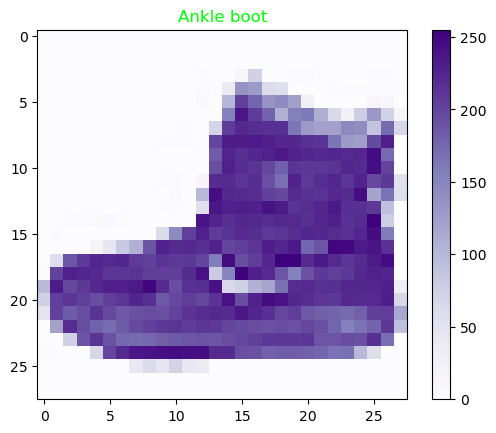

In [2]:
import matplotlib.pyplot as plt

# Метки классов
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Выбираем индекс изображения для отображения
image_index = 0

# Вывод изображения и его метки с лаймовым цветом текста на фиолетовом фоне
plt.figure()
plt.imshow(x_train[image_index], cmap='Purples')  # Фиолетовый фон
plt.colorbar()
plt.title(class_labels[y_train[image_index]], color='lime')  # Лаймовый цвет текста
plt.show()


## Предобработка

**Нормализуйте данные X_train и X_test **

In [3]:
# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [4]:
import numpy as np

# Устанавливаем batch_size, channels, H и W
batch_size = 32
channels = 1
H, W = 28, 28

# Изменяем форму массивов
x_train = x_train.reshape(-1, channels, H, W)
x_test = x_test.reshape(-1, channels, H, W)

**Преобразуйте  y_train и y_test в one_hot представления **

In [5]:
import tensorflow as tf

num_classes = 10
y_train_one_hot = tf.one_hot(y_train, depth=num_classes)
y_test_one_hot = tf.one_hot(y_test, depth=num_classes)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Загружаем данные
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация данных
x_train, x_test = x_train / 255.0, x_test / 255.0

# Преобразование меток в one-hot представление
y_train_one_hot = tf.one_hot(y_train, depth=10)
y_test_one_hot = tf.one_hot(y_test, depth=10)

# Изменение формы массивов
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Создаем модель
model = keras.Sequential([
    layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компилируем модель
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Тренируем модель
epochs = 10
history = model.fit(x_train, y_train_one_hot, epochs=epochs, batch_size=64, validation_data=(x_test, y_test_one_hot))

# Выводим информацию о тренировке
print("Training completed.")

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1660 - accuracy: 0.9499 - val_loss: 0.0705 - val_accuracy: 0.9775
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0450 - val_accuracy: 0.9842
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0405 - val_accuracy: 0.9856
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0247 - accuracy: 0.9927 - val_loss: 0.0390 - val_accuracy: 0.9865
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0359 - val_accuracy: 0.9890
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.0311 - val_accuracy: 0.9893
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0093 - 

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Получите предсказания модели на тестовой выборке
y_pred = model.predict(x_test)

# Преобразуйте one-hot представление предсказаний и истинных меток обратно в целые числа
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test

# Оцените модель
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9889
Precision: 0.9889198883804197
Recall: 0.9889
F1-Score: 0.9889008278337904


### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Получите предсказания модели на тестовой выборке
y_pred = model.predict(x_test)

# Оцените модель
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9889
Precision: 0.9889198883804197
Recall: 0.9889
F1-Score: 0.9889008278337904


In [ ]:
print(classification_report(y_test,predictions))

## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

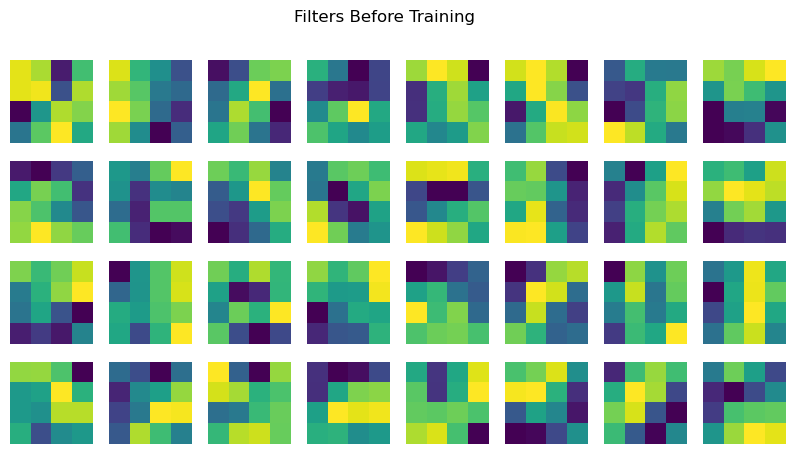

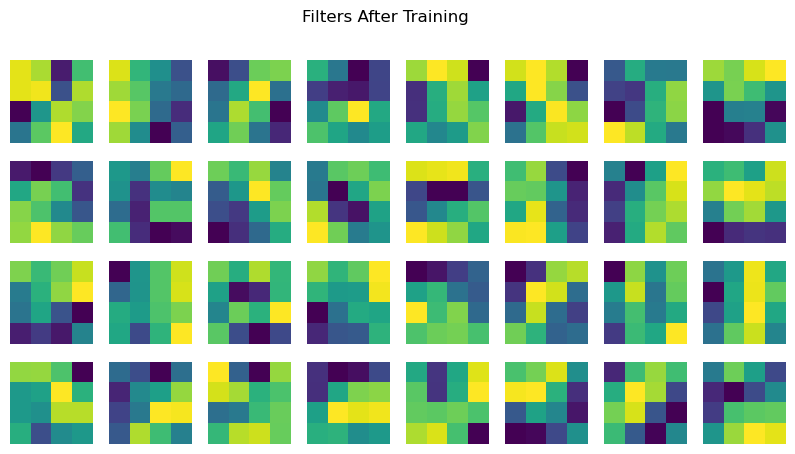

In [17]:
# Создайте модель, включая только сверточные слои
conv_model = Model(inputs=model.input, outputs=model.layers[0].output)  # Измените индекс на 0

# Получите фильтры из слоя
filters = model.layers[0].get_weights()[0]

# Отрисуйте фильтры до обучения модели
plt.figure(figsize=(10, 5))
for i in range(filters.shape[3]):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filters Before Training')
plt.show()

# Теперь обучите модель
# ...

# Отрисуйте фильтры после обучения модели
filters = model.layers[0].get_weights()[0]
plt.figure(figsize=(10, 5))
for i in range(filters.shape[3]):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filters After Training')
plt.show()